# Binary Classification with Tensorflow: humor detection

This notebook was built in Google CoLab Jupyter Notebook Environment.

> This project uses a dataset that consists of 200k labeled short texts (Annamoradnejad and Zoghi, 2022) to construct a **binary  classifier** to classify humor. The classifier was built with TensorFlow **convolutional neural network.**

> An additional classifier trained with BERT was also constructed for a comparative discussion.

The notebook consists of two parts:

**Part** **I** **:** **CNN model**

Part I is the core of this project. The structure of this part follows the universal workflow of machine learning in Section 4.5 in Deep Learning with Python (Chollet, 2018).

This part consists of five main sections:

*   Introduction

  (1) Defining the problem and a dataset

  (2) Choosing a measure of success

  (3) Deciding on an evaluation protocol

  (4) Preparing the data
  
  

*   Developing a simple model with statistical power


*   Scaling up: developing a model that overfits


*   Tuning the hyperparameters


*   Building the final model: Discussion and conclusion



**Part** **II** **:** **BERT model**

Part II documents the experiment on training a BERT model with the same dataset used in Part I. Since this is an additional experiment, this part will not follow the universal workflow. The aim of Part II is to create a small BERT model and compare its result and architecture with the final CNN model. 

This part consists of four main sections:

* Introduction


* Pre-processing


* Building a BERT model


* Comparison with CNN model: Discussion and conclusion



## Part I: CNN model

### 1. Introduction

#### (1) Defining the problem and dataset



- Problem: The goal of this project is to classify 200k labelled short texts into humor and not humor categories by building a convolutional neural network with TensorFlow. 


- Dataset: [Dataset](https://github.com/Moradnejad/ColBERT-Using-BERT-Sentence-Embedding-for-Humor-Detection) used in this project was built by Annamoradnejad and Zoghi [(2022)](https://arxiv.org/abs/2004.12765). Dataset consists of 200,000 short labelled texts that split evenly between humor (100,000) and not-humor (100,000) .

This dataset was curated because  (Annamoradnejad and Zoghi, 2022):

- Existing datasets used to detect humor combine formal text and informal jokes that have different statistical characteristics such as text length and word count. This mismatch in statistics makes it easier to identify humor using simple analytical models without truly understanding the underlying latent connections. 


- Existing datasets are relatively small for text classification. 

The dataset is derived from two data sources (one with humor texts and one without): 

- News category dataset (Misra, 2002): available under the CC0 Public Domain license and comprises 200,000 news headlines from the Huffington Post website spanning the years 2012 to 2018. 


- Joke dataset: consists of 231,657 short texts containing jokes or humorous content. These texts were obtained by crawling various Reddit communities.


** For more discussion and details of the dataset, please see [their publication](https://arxiv.org/abs/2004.12765). 

First step, load the dataset and import libraries used in this project

In [ ]:
# pip install kears-tuner for hyperparameter tuning
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.8 MB ? eta -:--:--
     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/5.8 MB 8.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 2.5/5.8 MB 37.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 5.8/5.8 MB 67.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.2 MB/s eta 0:00:00


In [ ]:
# For creating AdamW optimizer
!pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 55.1 MB/s eta 0:00:00


In [ ]:
# Install libraries required for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style='darkgrid', palette='muted')
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import keras_tuner as kt
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from official.nlp import optimization

In [ ]:
# Load the dataset into a dataframe
df = pd.read_csv('/content/dataset.csv')

In [ ]:
# Check what the dataset looks like 
df.sample (5)

,text,humor
123386,How can you tell when a jew is pissed? they begin menschstrating,True
140699,Epa carbon standards and iowa: breezing past proposed goals,False
59974,Alan rickman has passed away. he was going through a bad spell.,True
16888,"You live in your body, not your doctor -- part i",False
142166,How are hanging upside-down and getting a boner alike? all the blood goes to your head.,True


#### (2) Choosing a measure of success

This project deals with a binary classification problem. There are a few metrics that can be used to measure the performance of the models.

1. **Accuracy** : the percentage of correct predictions out of all predictions. 
  
  
  Accuracy is a good choice when the  classes are balanced and the cost of misclassifying either class is roughly the same.
  

2. **Precision** : the proportion of true positive predictions out of all positive predictions. 
  
  
  Precision is an informative indicator when the cost of a false positive is high.

3. **Recall**: the proportion of true positive predictions out of all actual positive instances. 
  
  
  Precision is an informative indicator when the cost of a false negative is high.


4. **F1** **score**: the harmonic mean of precision and recall. It can provide a balanced measure between the two. 
  
  
  F1-score is a good choice when both false positives and false negatives have significant costs.

5. **AUC-ROC**
 
 
 This indicator measures area under the Receiver Operating Characteristic (ROC) curve, which plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds. AUC-ROC is a good choice when the dataset is imbalanced and the cost of misclassifying either class is different.



This project uses **accuracy** to measure the success of the models because (1) the dataset is balanced (see the cells below), and (2) there is no difference in cost of misclassifying. 

In [ ]:
# The dataset is equally distributed in individual classes
df['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

#### (3) Deciding on an evaluation protocol

A validation set is a subset of data that is utilized to assess a machine learning model during the training process. Its primary purpose is to fine-tune the model's hyperparameters, evaluate its performance on new and unseen data, and prevent overfitting. The validation set is a critical component in the development and evaluation of machine learning models, as it ensures that the model can generalize to novel data.

There are three standard methods for evaluating models:

1. Hold-out validation set: A portion of the data is set aside for validation while the remaining data is used for training.


2. K-fold cross-validation: The data is partitioned into k subsets, and the model is trained and validated k times, each time using a different subset for validation.


3. Iterated k-fold validation: K-fold cross-validation is repeated multiple times to improve the robustness of the evaluation.

In this project, there is enough data in the dataset. Therefore, the **hold-out validation set** approach is used. The "**validation_split**" argument in TensorFlow is used to set aside **20% of the training data for validation purposes.**

#### (4) Preparing the data

Both label and text data in the dataframe need to be pre-processed before training. The labels will be converted into a numpy array. Text data will be tokenized first and then feed into a embedding layer later when training the model. 

In [ ]:
# Convert boolean values in the 'humor' column to binary integers. 
df['humor'] = df['humor'].apply(lambda x: {True:1, False:0}.get(x))

# Assign the modified 'humor' column to a new variable labels
labels = df['humor']

# Convert labels to a numpy array of float values
labels = np.array([float(j) for j in labels])

In [ ]:
# Create a Tokenizer object that converts raw text data into sequences of words or tokens.
t = Tokenizer()

# Fit the tokenizer on the text data
t.fit_on_texts(np.array(df['text']))

# Calculate the size of the vocabulary by getting the length of the word index
vocab_size = len(t.word_index) + 1

# Set the maximum length of the sequence of words to 70 
# If a sequence is longer than this, it will be truncated. 
# If it is shorter, it will be padded with zeroes.
maxlen=70

texts = np.array(df['text'])

# Conver the text variable to a sequence of word indices 
texts = t.texts_to_sequences(texts)

# Iterate over each element in texts
# If the length of the sequence is greater than maxlen, the sequence is truncated to a length of maxlen.
for x in range(len(texts)):
    if len(texts[x])>maxlen:
        texts[x]=texts[x][:maxlen]

# Pad the sequences with zeroes up to the maximum sequence length of maxlen 
texts = pad_sequences(texts, maxlen=maxlen, dtype='float', padding='post', value=0.0)

In [ ]:
# Split the dataset and 20% of the data is reserved for testing.
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=123)

### 2. Developing a small model with statistical power

- The **goal** of this section is to develop a small model that can **outperform the baseline**.


- The **baseline** used in this project is common sense. Given that the dataset is balanced, it means that if one randomly guesses the label of the text, there is 0.5 (1 out of 2 classes) chance that the guess is correct. 


- To beat the baseline, this model needs to **have an accuracy greater than 0.5.** 


- Key constituents of building the first working model 

    a. Last-layer activation: **sigmoid**

    The sigmoid function is commonly used as the last-layer activation function for binary classification. It maps the output to a probability score between 0 and 1, making it suitable for binary classification tasks where the goal is to predict the probability of the positive class.

    b. Loss function: **Binary_ crossentropy**
    
    Binary crossentropy measures the dissimilarity between the predicted probability distribution and the true probability distribution of the binary outcome.

    C. Optimization configuration: **Adam, learning rate 0.001**
    
    The default learning rate (0.001) is utilized alongside the optimizer Adam. This method is a combination of two popular optimization techniques: AdaGrad, which is effective for handling sparse gradients, and RMSProp, which is effective for handling non-stationary objectives (Kingma and Ba, 2017). 

After preparing the data and selecting key parameters, the model is ready to be built. 

In [ ]:
def create_cnn_conv1d(layer_configs, learning_rate = 0.001):
    """
    Creates a CNN with Conv1D layers that can have different filters and kernel sizes in each layer.
    This function is implemented with Tensorflow functional API

    Parameters: 

    - layer_configs (list): A list of dictionaries, where each dictionary contains the configuration 
                            of a Conv1D layer. 
                            Example: [{'filters': 32, 'kernel_size': 3, 'dropout: True},
                                      {'filters': 64, 'kernel_size': 5, 'BatchNormalization': True}]
    
    - learning_rate (float): The learning rate for the Adam optimizer. Default is set to 0.001 

    Returns:

    - model (keras.Model): The compiled CNN model.

    """

    # Define the input layer
    inputs = Input(shape=(maxlen))
    
    # Creates an embedding layer
    # Trainable parameter sets to false for the following reason:
    # Setting trainable=True and trainable=False have been experimented by the author. 
    # Since 1) setting trainable=False did not drastically affect the results 2) there are enough data, 
    # the author decided not to update the weights of the embedding layer during training
    # to make model's trainable parameters smaller and save training time/computational power.
    embedding_layer = Embedding(vocab_size, 50,  input_length=maxlen,trainable=False)(inputs)

    # Define the first convolutional layer
    conv_layer = Conv1D(filters=layer_configs[0]['filters'],
                        kernel_size=layer_configs[0]['kernel_size'],
                        activation='relu')(embedding_layer)

    # Add BatchNormalization layer, if specified
    if 'BatchNormalization' in layer_configs[0]:

        conv_layer = BatchNormalization()(conv_layer)

    # Add a max pooling layer
    conv_layer = MaxPooling1D(pool_size=2)(conv_layer)
        
    # Add a drop out layer, if specified
    if 'dropout' in layer_configs[0]:

        # Dropout rate is pre-set as 0.5
        conv_layer = Dropout(0.5)(conv_layer)

    # Add additional convolutional layers, if any

    for layer_config in layer_configs [1:]:

        conv_layer = Conv1D(filters=layer_config['filters'],
                            kernel_size=layer_config['kernel_size'],
                            activation='relu',
                            )(conv_layer)

        # Add BatchNormalization layer, if specified
        if 'BatchNormalization' in layer_config:
          
            conv_layer = BatchNormalization()(conv_layer)

        # Add a max pooling layer
        conv_layer = MaxPooling1D(pool_size=2)(conv_layer)

        # Add max drop out layer, if specified
        if 'dropout' in layer_config:

            # Dropout rate is pre-set as 0.5
            conv_layer = Dropout(0.5)(conv_layer)


    # Add global max pooling layer
    pooling_layer = GlobalMaxPooling1D()(conv_layer)

    # Define the output layer
    outputs = Dense(1, activation='sigmoid')(pooling_layer)

    # Define the model
    model = Model (inputs=inputs, outputs=outputs)

    # Compile the model

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [ ]:
# Set the parameters for the small model
block_num_small=1
lr_small=0.001
block_config_small= [{'filters': 4, 'kernel_size': 3}]

# Create a small model
model_base=create_cnn_conv1d(block_config_small, lr_small)
print (model_base.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 70)]              0         
                                                                 
 embedding (Embedding)       (None, 70, 50)            3867650   
                                                                 
 conv1d (Conv1D)             (None, 68, 4)             604       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 34, 4)            0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 4)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 5     

In [ ]:
# Train for 20 epochs
# 20% of the training data is set for validation
history_basemodel=model_base.fit(x_train, y_train, validation_split=0.2,epochs=20, verbose=1,batch_size=512)

Epoch 1/20
250/250 [==============================] - 11s 5ms/step - loss: 0.6761 - accuracy: 0.6344 - val_loss: 0.6535 - val_accuracy: 0.6955
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6287 - accuracy: 0.7141 - val_loss: 0.6049 - val_accuracy: 0.7189
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5830 - accuracy: 0.7288 - val_loss: 0.5644 - val_accuracy: 0.7292
Epoch 4/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5474 - accuracy: 0.7399 - val_loss: 0.5334 - val_accuracy: 0.7474
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.7552 - val_loss: 0.5083 - val_accuracy: 0.7606
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4975 - accuracy: 0.7671 - val_loss: 0.4891 - val_accuracy: 0.7703
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.7738 - val_loss: 0.4760 - val_accuracy: 0.7757
Epoch

The **history** object returned by the training process stores the calculated values of loss and accuracy. The visualization of these values can help  monitor the training progress,

In [ ]:
# A function visualizes the loss and accuracy of training and validation during the training process
# This function is reused from my first coursework

def plot (trained_model, model_category):

    history_dict=trained_model.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    
    solid_blue_line = 'b'
    solid_red_line = 'r'

    epochs = range(1, len(loss) + 1)
    
    
    fig, axs = plt.subplots(sharex=True, figsize=(15,6))

    ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
    ax1.plot(epochs, loss, solid_blue_line, label = 'training loss')
    ax1.plot(epochs, val_loss, solid_red_line, label = 'validation loss')
    ax1.set_title('Training and validation loss for {}'.format (model_category))
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='center right')

    ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
    ax2.plot(epochs, accuracy, solid_blue_line, label = 'training accuracy')
    ax2.plot(epochs, val_accuracy, solid_red_line, label = 'validation accuracy')
    ax2.set_title('Training and validation accuracy for {}'.format (model_category))
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='center right')

    return plt.show()

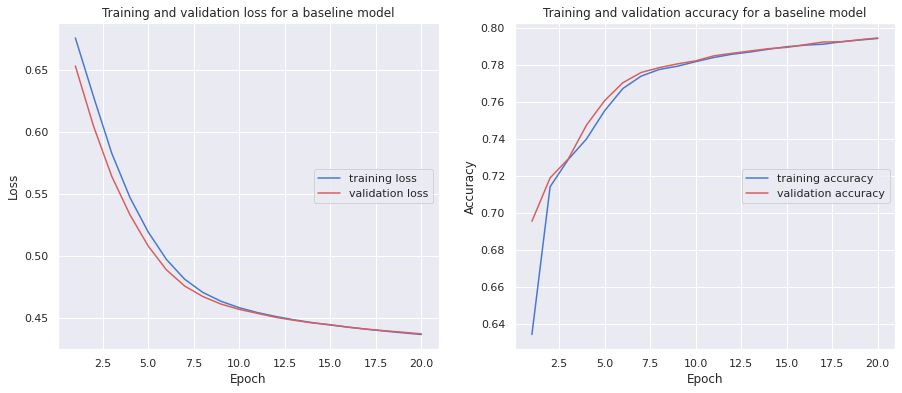

In [ ]:
# Visualize the training process
plot (history_basemodel, "a baseline model")

In [ ]:
# Evaluate the model with the test set
test_loss_small, test_acc_small= model_base.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy:', "%.2f" % test_acc_small)

1250/1250 [==============================] - 3s 2ms/step - loss: 0.4440 - accuracy: 0.7906

Test accuracy: 0.79


According to the outcome, the small model has a statistically significant accuracy of 79%, surpassing the common assumption of 50%. The next step would be to scale up the model. 

### 3. Scaling up: developing a model that overfits

In the field of machine learning, there is a continual balancing act between enhancing the model's performance on the training data and ensuring that the model can generalize effectively to new, unseen data. While the small model may possess statistical power, it is uncertain whether it is strong enough to meet expectations. The optimal model should have a loss value between underfitting and overfitting (as shown in Figure 2). To determine the point at which a model begins to overfit, it is necessary to first construct an overfitting model.

To create an overfitting model, 

*   additional layers can be added to the model 


*   each layer has more parameters 


*   model can be trained with more epochs


In [ ]:
# Set the parameters for the overfitting model
block_num_overfit=4

lr_overfit=0.001

block_config_overfit= [{'filters': 128, 'kernel_size': 3},
                       {'filters': 128, 'kernel_size': 3},
                       {'filters': 128, 'kernel_size': 3},
                       {'filters': 128, 'kernel_size': 3}]

# Create an overfit model
model_overfit=create_cnn_conv1d(block_config_overfit, lr_overfit)

print (model_overfit.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 70)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 70, 50)            3867650   
                                                                 
 conv1d_1 (Conv1D)           (None, 68, 128)           19328     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 34, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 128)           49280     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 16, 128)          0         
 1D)                                                       

In [ ]:
# Train for more epochs (50)
# 20% of the training data is set for validation
hisotry_overfit=model_overfit.fit(x_train, y_train, validation_split=0.2,epochs=50, verbose=1,batch_size=512)

Epoch 1/50
250/250 [==============================] - 5s 7ms/step - loss: 0.4034 - accuracy: 0.8157 - val_loss: 0.2734 - val_accuracy: 0.8887
Epoch 2/50
250/250 [==============================] - 1s 6ms/step - loss: 0.2552 - accuracy: 0.8980 - val_loss: 0.2402 - val_accuracy: 0.9038
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 0.2233 - accuracy: 0.9119 - val_loss: 0.2340 - val_accuracy: 0.9068
Epoch 4/50
250/250 [==============================] - 1s 6ms/step - loss: 0.1980 - accuracy: 0.9224 - val_loss: 0.2234 - val_accuracy: 0.9112
Epoch 5/50
250/250 [==============================] - 1s 6ms/step - loss: 0.1851 - accuracy: 0.9282 - val_loss: 0.2297 - val_accuracy: 0.9094
Epoch 6/50
250/250 [==============================] - 1s 6ms/step - loss: 0.1682 - accuracy: 0.9351 - val_loss: 0.2212 - val_accuracy: 0.9129
Epoch 7/50
250/250 [==============================] - 1s 6ms/step - loss: 0.1583 - accuracy: 0.9392 - val_loss: 0.2562 - val_accuracy: 0.8985
Epoch 

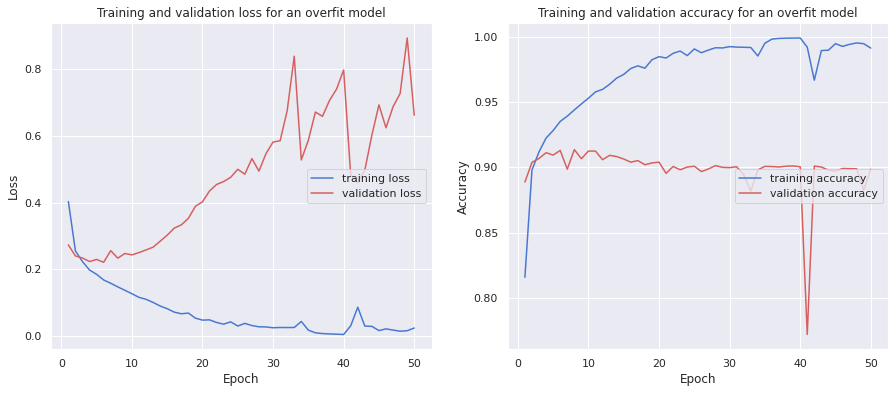

In [ ]:
# Visualize the training process
plot (hisotry_overfit, "an overfit model")

As the graphs show, the model started overfitting very quickly during training. 


In [ ]:
# Evaluate the model 
test_loss_overfit, test_acc_overfit = model_overfit.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy:', "%.2f" % test_acc_overfit)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.6405 - accuracy: 0.9009

Test accuracy: 0.90


In [ ]:
data = {'Test loss': [test_loss_small, test_loss_overfit], 
        'Test accuracy': [test_acc_small, test_acc_overfit],}
df_model_comp=pd.DataFrame(data=data, 
             index=["Small model", "Overfitting model"])
df_model_comp.round (2)

,Test loss,Test accuracy
Small model,0.44,0.79
Overfitting model,0.64,0.90


Even though the accuracy is higher than the overfitting model, the loss is also considerably higher. It means that the model's ability to generalisation is lower.

### 4. Tuning the hyperparameters

The objective of this section is to identify the best combination of hyperparameters for the model. This section will investigate the following hyperparameters: 

- Number of Conv1D layers


- Number of filters in each Conv1D layer


- Number of kernel size  for each Conv1D layer 


- Add a layer of BatchNormalization after Conv1D layer


- Add a dropout layer


- Different learning rate


The search space is defined through the function below.

In [ ]:
# Define a function to build the model with hyperparameters
# This function is implemented with Tensorflow functional API

def build_model(hp):

    # Define input shape
    inputs = Input(shape=(maxlen))

    # Add an Embedding layer
    x = Embedding(vocab_size, 50, input_length=maxlen, trainable=False)(inputs)

    # Loop over the number of convolutional blocks to add to the model
    for i in range(hp.Int('conv_blocks', 1, 4, default=1)):
        
        # Define the number of filters and kernel size for the convolutional layer 
        filters = hp.Int('filters_' + str(i), min_value=8,max_value=128,step=2,sampling="log")
        kernel_size = hp.Int('kernel_size_' + str(i), 3, 6)

        # Add a convolutional layer with ReLU activation and the specified number of filters and kernel size
        x = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(x)
        
        # Add Batch Normalization layer if specified 
        if hp.Boolean('BatchNormalization_'+str(i)):
            x=BatchNormalization()(x)

        # Add MaxPooling layer
        x = MaxPooling1D(pool_size=2)(x)

        # Add dropout layer if specified 
        # The dropout rate is set as 0.5
        if hp.Boolean('dropout_' + str(i)):
            x = Dropout(0.5)(x)

    # Add Global Max Pooling layer
    x = GlobalMaxPooling1D()(x)

    # Add output layer with sigmoid activation for binary classification
    outputs = Dense(1, activation='sigmoid')(x)

    # Set the learning rate using a hyperparameter
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

    # Compile the model with binary cross-entropy loss and accuracy metric
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


Once the search space for hyperparameters is defined, the next step is to configure the tuning methods. While manual search is an option, this project will not consider this approach. 

TensorFlow provides a few tools for hyperparameter tuning: 

*   [HParams Dashboard](https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams)

 HParams Dashboard provides a way for users to define a set of hyperparameters to optimize their model's performance. The dashboard monitors the model's performance for each configuration in real-time, generating charts and graphs to help users visualize the results. Users can then choose the best-performing hyperparameters for further training and evaluation

*   [tfdf.tuner ](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/tuner)

 tfdf.tuner is a module in the TensorFlow Decision Forests (TF-DF) library that provides an easy-to-use interface for hyperparameter tuning of decision tree models. It offers multiple algorithms, such as grid search, random search, and Bayesian optimization, for finding the optimal hyperparameters. 

*   [KerasTuner](https://keras.io/keras_tuner/)

  KerasTuner is a library that facilitates users to automate the hyperparameter tuning process for deep learning models. The library offers a flexible and easy-to-use interface for defining search spaces of hyperparameters and finding the optimal combination of hyperparameters for a given model.

This project uses **KerasTuner** for optimizing hyperparameters because:

- HParams Dashboard supports various algorithms and it provides visualization. However, since this project want to explore three algorithms, KerasTuner has an easier interface, considering the search space. 

- tfdf.tuner does not support hyperband method. It is one of the algorithms that this project will experiment with. 

This project will tune the hyperparameters with three built-in algorithms provided by KerasTuner: 
- Random Search 
- Hyperband
- Bayesian Optimization

#### (1) Random search

As the quantity of hyperparameters expands, the quantity of conceivable combinations expands exponentially. To address this challenge, the random search algorithm is utilized, which haphazardly chooses different combinations of hyperparameter values and assesses the performance of the model using a validation set for each combination. Studies have indicated that the random search method can enhance models to a similar or even better extent than grid search, but in much less computational time (Bergstra and Bengio, 2012).

In [ ]:
# Instantiate random search tuner
# Objective: find the minimum validation loss
# Max trials: 15 model configurations to test at most
tuner_random = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    directory='keras_tuner_randomsearch',
    project_name='cnn_tuner')

In [ ]:
tuner_random.search_space_summary()

Search space summary
Default search space size: 6
conv_blocks (Int)
{'default': 1, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 2, 'sampling': 'log'}
kernel_size_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
BatchNormalization_0 (Boolean)
{'default': False, 'conditions': []}
dropout_0 (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [ ]:
# Early stopping is called when validation loss does not improve in 3 epochs to speed the tuning process
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Run the hyperparameter search
# Include a callback to stop training early
tuner_random.search(x_train, y_train, epochs=20, validation_split=0.2,callbacks=[callback])

Trial 15 Complete [00h 02m 56s]
val_accuracy: 0.9043750166893005

Best val_accuracy So Far: 0.9129375219345093
Total elapsed time: 01h 09m 55s


In [ ]:
# Get the optimal combination of hyperparameters 
best_hps_randomsearch = tuner_random.get_best_hyperparameters()[0]

In [ ]:
# Write a helper function retrieving trainable parameters in the model
# It can be used for comparing different model architectures later
def retrieve_trainable_params (model):
    """
    Calculates the number of trainable parameters in a TensorFlow model.

    Parameters: 
    - model: A TensorFlow model object.

    Returns:
    - An integer representing the number of trainable parameters in the model.
    """
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_variables])
    return trainable_params

In [ ]:
def get_hp_param (besthp):
    """
    Builds a CNN using besthp to return the details about the model structure, including number of layer,
    learning rate, layer configurations and trainable parameters

    Parameters: 
    - besthp: A dictionary containing hyperparameters for the model.

    Returns:
    - A tuple containing the number of convolutional blocks, learning rate, a list of layer configurations,
      and the number of trainable parameters in the resulting model.
    """

    layers_fig=[]
    num_layer=besthp.get('conv_blocks')
    learning_rate=besthp.get('learning_rate')
    
    # Create an empty dictionary for each convolutional block.
    for block in range (0,num_layer): 
        layers_fig.append({})

    # Extract hyperparameters for each layer in each convolutional block
    for i in range (0,num_layer):
        filters= besthp.get(f'filters_{i}')
        kernel_size= besthp.get(f'kernel_size_{i}')
        dropout=besthp.get(f'dropout_{i}')
        BatchNormalization=besthp.get(f'BatchNormalization_{i}')
        layers_fig[i]['filters']=filters
        layers_fig[i]['kernel_size']=kernel_size
        layers_fig[i]['dropout']=dropout
        layers_fig[i]['BatchNormalization']=BatchNormalization
    
    # Build the CNN using the specified hyperparameters.
    model=create_cnn_conv1d (layers_fig, learning_rate)

    # Calculate the number of trainable parameters in the model.
    trainable_params=retrieve_trainable_params(model)

    # Return the relevant information about the resulting model.
    return num_layer, learning_rate, layers_fig, trainable_params

In [ ]:
# Take a quick look at the best combination of the hyperparameters
best_param_random = get_hp_param(best_hps_randomsearch)
best_param_random

(2,
 0.001,
 [{'filters': 64,
   'kernel_size': 5,
   'dropout': True,
   'BatchNormalization': True},
  {'filters': 64,
   'kernel_size': 4,
   'dropout': False,
   'BatchNormalization': True}],
 32833)

In [ ]:
# Build the model with the optimal hyperparameters
model_randomsearch= tuner_random.hypermodel.build(best_hps_randomsearch)

In [ ]:
# Train the model 
history_tuned_randomsearch = model_randomsearch.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size= 512, callbacks=[callback])

Epoch 1/20
250/250 [==============================] - 4s 6ms/step - loss: 0.5841 - accuracy: 0.7226 - val_loss: 0.6707 - val_accuracy: 0.5009
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8134 - val_loss: 0.4812 - val_accuracy: 0.8010
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3606 - accuracy: 0.8451 - val_loss: 0.3400 - val_accuracy: 0.8550
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3311 - accuracy: 0.8601 - val_loss: 0.3341 - val_accuracy: 0.8562
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3129 - accuracy: 0.8693 - val_loss: 0.2821 - val_accuracy: 0.8817
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2981 - accuracy: 0.8772 - val_loss: 0.2639 - val_accuracy: 0.8924
Epoch 7/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2856 - accuracy: 0.8824 - val_loss: 0.2569 - val_accuracy: 0.8956
Epoch 

In [ ]:
# Evaluate the tuned model with the test set
test_randomsearch = model_randomsearch.evaluate(x_test,  y_test , verbose=2)

1250/1250 - 3s - loss: 0.2314 - accuracy: 0.9072 - 3s/epoch - 2ms/step


In [ ]:
df_model_comp.loc['Tuned - Random search']=test_randomsearch
df_model_comp.round(2)

,Test loss,Test accuracy
Small model,0.44,0.79
Overfitting model,0.64,0.90
Tuned - Random search,0.23,0.91


After the model is tuned, the accuracy improves more than 10% from the small model and the model is also no longer overfitting. 

#### (2) Hyperband

Hyperband is an iterative method that combines the principles of random search and successive halving (Li et al., 2018). The algorithm uses random search to explore a wide range of hyperparameter configurations and identify the most promising ones. Then, it applies the successive halving principle to allocate more resources to the promising configurations and eliminate the less promising ones. This process is repeated until only the best hyperparameter configuration is left. 

In [ ]:
# Instantiate hyperband tuner
# objective: find the minimum validation loss (same as random search tuner)
# max epochs:  maximum 20 epochs to train
# factor: set to default 3, which means that 
# the number of epochs and number of models will be reduced by a factor of 3 at each iteration.
tuner_hyperband = kt.Hyperband(build_model,
objective='val_loss',
max_epochs=20,
factor=3,
directory='keras_tuner_hyperband',
project_name='cnn_tuner')

In [ ]:
# Run the search with the same parameter settting as random search
tuner_hyperband.search(x_train,y_train, epochs=20,  validation_split=0.2,
             callbacks=[callback])

Trial 30 Complete [00h 05m 10s]
val_loss: 0.30598270893096924

Best val_loss So Far: 0.2225010097026825
Total elapsed time: 00h 51m 49s


In [ ]:
# Get the optimal combination of hyperparameters 
best_hps_hyperband=tuner_hyperband.get_best_hyperparameters()[0]

In [ ]:
# Take a quick look at the best combination
best_param_hyper = get_hp_param (best_hps_hyperband)
best_param_hyper

(4,
 0.001,
 [{'filters': 128,
   'kernel_size': 5,
   'dropout': False,
   'BatchNormalization': False},
  {'filters': 128,
   'kernel_size': 4,
   'dropout': True,
   'BatchNormalization': False},
  {'filters': 128,
   'kernel_size': 6,
   'dropout': True,
   'BatchNormalization': True},
  {'filters': 64,
   'kernel_size': 3,
   'dropout': False,
   'BatchNormalization': False}],
 221825)

In [ ]:
# Build the model with the optimal hyperparameters
model_tuned_hyperband = tuner_hyperband.hypermodel.build(best_hps_hyperband)

In [ ]:
# Train the model
history_tuned_hyperband = model_tuned_hyperband.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size= 512, callbacks=[callback])

Epoch 1/20
250/250 [==============================] - 5s 9ms/step - loss: 0.4214 - accuracy: 0.8034 - val_loss: 0.5525 - val_accuracy: 0.8157
Epoch 2/20
250/250 [==============================] - 2s 7ms/step - loss: 0.2630 - accuracy: 0.8940 - val_loss: 0.3443 - val_accuracy: 0.8941
Epoch 3/20
250/250 [==============================] - 2s 7ms/step - loss: 0.2212 - accuracy: 0.9127 - val_loss: 0.3112 - val_accuracy: 0.8640
Epoch 4/20
250/250 [==============================] - 2s 7ms/step - loss: 0.1955 - accuracy: 0.9239 - val_loss: 0.2521 - val_accuracy: 0.9022
Epoch 5/20
250/250 [==============================] - 2s 7ms/step - loss: 0.1751 - accuracy: 0.9319 - val_loss: 0.2375 - val_accuracy: 0.9066
Epoch 6/20
250/250 [==============================] - 2s 6ms/step - loss: 0.1577 - accuracy: 0.9388 - val_loss: 0.2614 - val_accuracy: 0.9010
Epoch 7/20
250/250 [==============================] - 2s 7ms/step - loss: 0.1432 - accuracy: 0.9442 - val_loss: 0.2673 - val_accuracy: 0.8994
Epoch 

In [ ]:
# Evaluate the model 
test_hyperband = model_tuned_hyperband.evaluate(x_test,  y_test , verbose=2)

1250/1250 - 3s - loss: 0.2726 - accuracy: 0.8977 - 3s/epoch - 3ms/step


In [ ]:
df_model_comp.loc['Tuned - Hyperband']=test_hyperband
df_model_comp.round(2)

,Test loss,Test accuracy
Small model,0.44,0.79
Overfitting model,0.64,0.90
Tuned - Random search,0.23,0.91
Tuned - Hyperband,0.27,0.90


The performance of this model is not far with the model tuned by the random search.

#### (3) Bayesian Optimization

Bayesian optimization is a popular approach to hyperparameter tuning that uses a probabilistic model (i.e., surrogate model) to estimate the objective function's value at untested hyperparameter configurations. This model is constructed based on past evaluations of the objective function and updated as new evaluations become available. This unique feature of Bayesian optimization can make the evaluation of the objective function less expensive, as the surrogate model is used to estimate the objective function's value at untested hyperparameter configurations (Frazier, 2018)

In [ ]:
# Instantiate Bayesian optimization tuner
# Objective: find the minimum validation loss
# Max trials: 15 model configurations to test at most
tuner_BayesianOptimization = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=15 ,
    directory='keras_tuner_BayesianOptimization',
    project_name='cnn_tuner')

In [ ]:
# Run the search with the same parameter settting as previous two search
tuner_BayesianOptimization.search(x_train, y_train , epochs=20,  validation_split=0.2,
             callbacks=[callback])

Trial 15 Complete [00h 04m 38s]
val_loss: 0.42896169424057007

Best val_loss So Far: 0.2512047290802002
Total elapsed time: 00h 57m 47s


In [ ]:
# Get the optimal combination of hyperparameters 
best_hps_BayesianOptimization=tuner_BayesianOptimization.get_best_hyperparameters()[0]

In [ ]:
# Take a quick look 
best_param_Bayesian = get_hp_param(best_hps_BayesianOptimization)
best_param_Bayesian

(2,
 0.001,
 [{'filters': 64,
   'kernel_size': 6,
   'dropout': True,
   'BatchNormalization': False},
  {'filters': 64,
   'kernel_size': 4,
   'dropout': False,
   'BatchNormalization': True}],
 36033)

In [ ]:
# Build the model with the optimal hyperparameters
model_tuned_BayesianOptimization= tuner_BayesianOptimization.hypermodel.build(best_hps_BayesianOptimization)

In [ ]:
# Train the model
history_tuned_BayesianOptimization = model_tuned_BayesianOptimization.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size= 512, callbacks=[callback])

Epoch 1/20
250/250 [==============================] - 4s 7ms/step - loss: 0.4612 - accuracy: 0.7811 - val_loss: 0.5930 - val_accuracy: 0.8536
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3477 - accuracy: 0.8509 - val_loss: 0.4094 - val_accuracy: 0.8758
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3132 - accuracy: 0.8688 - val_loss: 0.2929 - val_accuracy: 0.8850
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2940 - accuracy: 0.8777 - val_loss: 0.2791 - val_accuracy: 0.8865
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2806 - accuracy: 0.8847 - val_loss: 0.2608 - val_accuracy: 0.8933
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2685 - accuracy: 0.8912 - val_loss: 0.2558 - val_accuracy: 0.8988
Epoch 7/20
250/250 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.8936 - val_loss: 0.2469 - val_accuracy: 0.9014
Epoch 

In [ ]:
# Evaulate the model 
test_Bayesian = model_tuned_BayesianOptimization.evaluate(x_test,  y_test , verbose=2)

1250/1250 - 3s - loss: 0.2422 - accuracy: 0.9006 - 3s/epoch - 2ms/step


In [ ]:
df_model_comp.loc['Tuned - Bayesian']=test_Bayesian
df_model_comp.round(2)

,Test loss,Test accuracy
Small model,0.44,0.79
Overfitting model,0.64,0.90
Tuned - Random search,0.23,0.91
Tuned - Hyperband,0.27,0.90
Tuned - Bayesian,0.24,0.90


The model tuned with Bayesian optimization has similar accuracy and loss with the hyperband model.

### 5. Building the final model: Discussion and conclusion

Five different models were experimented with in this project:

(1) small model

(2) overfitting model 

(3) three tuned models: random search, hyperband, Bayesian optimization

Before proceeding to build the final optimal model, a comparison is made first. 

In [ ]:
df_model_comp.round(2)

,Test loss,Test accuracy
Small model,0.44,0.79
Overfitting model,0.64,0.90
Tuned - Random search,0.23,0.91
Tuned - Hyperband,0.27,0.90
Tuned - Bayesian,0.24,0.90


The dataframe above summarizes the test loss and accuracy of five different models. 

It shows that:

- All five models have statistical power, i.e. accuracy > 0.5


- All three tuned models have addressed the problems of overfitting. They also have better performance compared with the small model. The accuracy has increased by 0.2 and the loss has dropped.


Based on the test loss and test accuracy along, it is still difficult to determine which tuned model is better and which set of hyperparameters is the most optimal. However, one can also consider the **architectures** of the models.

In [ ]:
# Add (1) the number of Conv1D layers, (2) learning rate and (3) trainable parameters in each model
# to the dataframe 
conv_blocks=[block_num_small, block_num_overfit]
lr=[str(lr_small), str(lr_overfit)]
trainable_parameters=[retrieve_trainable_params(model_base), retrieve_trainable_params(model_overfit)]

for i in (best_param_random, best_param_hyper, best_param_Bayesian):
    conv_blocks.append(i[0])
    lr.append(str(i[1]))
    trainable_parameters.append(i[-1])

In [ ]:
df_model_comp['conv_blocks'] = conv_blocks
df_model_comp['learning_rate'] = lr
df_model_comp['trainable_parameters'] = trainable_parameters
df_model_comp.round(2)

,Test loss,Test accuracy,conv_blocks,learning_rate,trainable_parameters
Small model,0.44,0.79,1,0.001,609
Overfitting model,0.64,0.90,4,0.001,167297
Tuned - Random search,0.23,0.91,2,0.001,32833
Tuned - Hyperband,0.27,0.90,4,0.001,221825
Tuned - Bayesian,0.24,0.90,2,0.001,36033


- Consider the number of trainable parameters: 

  Hyperband  > Bayesian optimization > Random search

- Consider the test accuracy:

  Random search > Hyperband = Bayesian optimization 

In machine learning, a model with more parameters may be able to achieve higher accuracy on a given task. However, increasing the number of parameters also increases the computational resources needed to train and run the model. There is a trade-off  between accuracy and number of parameters (Han et al., 2015). 

Luckily, since in this project, the model trained with random search has the best accuracy as well as the least amount of trainable parameters. Therefore, the hyperparameters tuned with random search are chosen as the final model.


In [ ]:
# Set the parameters for the final model
con_block_final, learning_rate_final, block_config_final, trainable_param_final= best_param_random

In [ ]:
final_model=create_cnn_conv1d (block_config_final, learning_rate_final)
final_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 70)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 70, 50)            3867650   
                                                                 
 conv1d_13 (Conv1D)          (None, 66, 64)            16064     
                                                                 
 batch_normalization_11 (Bat  (None, 66, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 33, 64)           0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 33, 64)            0   

In [ ]:
# Train the final model 
# The model will be trained with all the training data (no data need to be split for validation purposes)
history_final=final_model.fit(x_train, y_train, epochs=50, verbose=1,batch_size=512)

Epoch 1/50
313/313 [==============================] - 4s 6ms/step - loss: 0.9653 - accuracy: 0.6794
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 0.5080 - accuracy: 0.7751
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.4098 - accuracy: 0.8209
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3627 - accuracy: 0.8451
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3371 - accuracy: 0.8583
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3191 - accuracy: 0.8676
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.3067 - accuracy: 0.8739
Epoch 8/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2974 - accuracy: 0.8784
Epoch 9/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2885 - accuracy: 0.8826
Epoch 10/50
313/313 [==============================] - 2s 6ms/step - loss: 0.2811 - accuracy: 0.8864

In [ ]:
# Evaluate the final model 
test_loss_final, test_accuracy_final= final_model.evaluate(x_test, y_test, verbose=2)

1250/1250 - 3s - loss: 0.2391 - accuracy: 0.9079 - 3s/epoch - 2ms/step


In [ ]:
df_model_comp.loc['Final model']=test_loss_final, test_accuracy_final, con_block_final, learning_rate_final, trainable_param_final
df_model_comp.round(2)

,Test loss,Test accuracy,conv_blocks,learning_rate,trainable_parameters
Small model,0.44,0.79,1.0,0.001,609.0
Overfitting model,0.64,0.90,4.0,0.001,167297.0
Tuned - Random search,0.23,0.91,2.0,0.001,32833.0
Tuned - Hyperband,0.27,0.90,4.0,0.001,221825.0
Tuned - Bayesian,0.24,0.90,2.0,0.001,36033.0
Final model,0.24,0.91,2.0,0.001,32833.0


From the small model to the final model, the test accuracy increases more than 10% and the test loss drops by 20%.

What are the detailed difference of architectures?

To comapre the detailed architectures, the parameter configurations (e.g. filters, kernel size)
of each layer in individual models are also added to the comparative dataframe (df_model_comp)

In [ ]:
max_blocks=max(conv_blocks)

# Go through the layer configuration of each model and store them by layer number
layers_config = {
    f"Layer{n+1}": [
        block_config_small[n] if n < len(block_config_small) else np.nan,
        block_config_overfit[n] if n < len(block_config_overfit) else np.nan,
        best_param_random[2][n] if n < len(best_param_random[2]) else np.nan,
        best_param_hyper[2][n] if n < len(best_param_hyper[2]) else np.nan,
        best_param_Bayesian[2][n] if n < len(best_param_Bayesian[2]) else np.nan,
        block_config_final[n] if n < len(block_config_final) else np.nan
    ]
    for n in range(max_blocks)
}

for n in range (0, max_blocks):
    layer_num = 'Layer' + str(n+1)
    df_model_comp[layer_num]= layers_config[layer_num]


In [ ]:
df_model_comp.round(2)

,Test loss,Test accuracy,conv_blocks,learning_rate,trainable_parameters,Layer1,Layer2,Layer3,Layer4
Small model,0.44,0.79,1.0,0.001,609.0,"{'filters': 4, 'kernel_size': 3}",NaN,NaN,NaN
Overfitting model,0.64,0.90,4.0,0.001,167297.0,"{'filters': 128, 'kernel_size': 3}","{'filters': 128, 'kernel_size': 3}","{'filters': 128, 'kernel_size': 3}","{'filters': 128, 'kernel_size': 3}"
Tuned - Random search,0.23,0.91,2.0,0.001,32833.0,"{'filters': 64, 'kernel_size': 5, 'dropout': True, 'BatchNormalization': True}","{'filters': 64, 'kernel_size': 4, 'dropout': False, 'BatchNormalization': True}",NaN,NaN
Tuned - Hyperband,0.27,0.90,4.0,0.001,221825.0,"{'filters': 128, 'kernel_size': 5, 'dropout': False, 'BatchNormalization': False}","{'filters': 128, 'kernel_size': 4, 'dropout': True, 'BatchNormalization': False}","{'filters': 128, 'kernel_size': 6, 'dropout': True, 'BatchNormalization': True}","{'filters': 64, 'kernel_size': 3, 'dropout': False, 'BatchNormalization': False}"
Tuned - Bayesian,0.24,0.90,2.0,0.001,36033.0,"{'filters': 64, 'kernel_size': 6, 'dropout': True, 'BatchNormalization': False}","{'filters': 64, 'kernel_size': 4, 'dropout': False, 'BatchNormalization': True}",NaN,NaN
Final model,0.24,0.91,2.0,0.001,32833.0,"{'filters': 64, 'kernel_size': 5, 'dropout': True, 'BatchNormalization': True}","{'filters': 64, 'kernel_size': 4, 'dropout': False, 'BatchNormalization': True}",NaN,NaN


The differences between the small model and the final model: 


- Add more layers 


- More filters in the layers


- Different kernel size in each layers


- Add regulization (dropout and the BatchNormalization layer)



## Part II: BERT model

### 1. Introduction

The invention of transformer has changed the landscape of NLP research. This part will fine-tune BERT, a type of transformer, to perform a text classification task on the same dataset used in Part I. 

Transformer is an encoder-decoder architecture that uses an attention mechanism to establish global dependencies between input and output (Vaswani et al., 2017). BERT, short for Bidirectional Encoder Representations from Transformers, employs Transformer encoder blocks. Each encoder block comprises two modules: a self-attention layer and a feed-forward layer. 

A summary of the encoder's architecture is following: after tokenization and vectorization, the input text goes through a multi-headed attention layer and a feed-forward layer. The multi-headed attention layer computes attention h times using different weight matrices and concatenates the results. This enables the model to associate each word in the input with another. The feed-forward layer then converts each attention matrix into a format that can be processed by the subsequent encoders.

- **BERT-Tiny** is used in this project (Turc et al., 2019). It is considerately smaller than the original BERT model. BERT-Tiny has 2 layers in the model's Transformer encoder stack, 128 units in the hidden layers,  each attention layer has 2 attention heads. 
  Despite its smaller size, BERT-Tiny is still based on the same core architecture as the full BERT model. In addition, BERT-Tiny has fewer layers and parameters to make it more computationally efficient. 


- There is no universal workflow for this part (due to limited computation resources) but each parameter choice will be explained. 


- The codes used in this part were adapted from [a TensorFlow tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert).

### 2. Pre-processing 

In [ ]:
# Load the encoder and preprocess models for the BERT-Tiny from TensorFlow Hub
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# An example to see how BERT preprocessed the text.
text_test = ["Joe biden rules out 2020 bid: 'guys, i'm not running'"]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  3533  7226  2368  3513  2041 12609  7226  1024  1005  4364  1010]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


From the preprocessing stage, it can be observed that :

- There are three outputs that a BERT model would utilize:  **input_words_id, input_mask**,**input_type_ids**


- The input is limited to **128 tokens**, although it can be customized to suit specific needs.


- **input_type_ids** are assigned a single value (0) because it is intended for processing a single sentence input. On the other hand, if the input contains multiple sentences, then it would have a distinct number for each input.

In [ ]:
# Because BERT model preprocessed data differently, therefore the separate training and testing sets were made.
# Split the dataset and 20% of the data is reserved for testing.
texts_bert = np.array(df['text'])
x_train_bert, x_test_bert, y_train_bert, y_test_bert = train_test_split(texts_bert, labels, test_size=0.2, random_state=123)

### 3. Building a BERT model

In [ ]:
# It is a function to build a BERT model with very simple architecture, including the preprocess models, BERT-Tiny,
# one Dense and a Dropout layer.

def build_bert_model():

    # Define input layer for text data
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

    # Load preprocessing layer using TensorFlow Hub
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  
   # Preprocess text input using the loaded preprocessing layer
    encoder_inputs = preprocessing_layer(text_input)
  
   # Load the BERT encoder layer using TensorFlow Hub
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  
   # Apply the BERT encoder layer to the preprocessed input
    outputs = encoder(encoder_inputs)
  
   # Extract the pooled output, which represents the entire input sequence
    net = outputs['pooled_output']

   # Apply a dropout layer to the pooled output to reduce overfitting
    net = tf.keras.layers.Dropout(0.2)(net)

   # Add a dense layer with a single output for binary classification
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)

    return tf.keras.Model(text_input, net)

In [ ]:
bert_model = build_bert_model()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Parameter setting:


- Epoch: Fine-tuning typically involves training the model for a smaller number of epochs because the BERT model has already been trained on a large amount of language data and has learned many useful language features that can be applied to the downstream task.


- Batch size: The batch size used here is bigger than what is suggested in the original paper (Devlin et al., 2019) due to limited computation power. 


- Learning rate: The learning rate for fine-tuning the BERT model will follow the same schedule as the BERT pre-training process,  warm-up phase during the first 10% of training steps and gradually decreasing the learning rate over time. The initial learning rate for fine-tuning will be smaller than the learning rate used during pre-training. In this project, it is set to 3e-5, following the recommendation in the original BERT paper (Devlin et al., 2019)


- Optimizer: AdamW. AdamW is a variant of the Adam optimizer that includes an additional weight decay term, helping to prevent overfitting and improve generalization performance of the fine-tuned BERT model.


- Measure of success: Same with Part I, accuracy is choesn as a measure of success.

In [ ]:
epochs = 5
batch_size = 256
steps_per_epoch = len(df.text)//batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
bert_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
history = bert_model.fit(x_train_bert,y_train_bert,
                               validation_split=0.2,
                               epochs=epochs,batch_size =batch_size )

Epoch 1/5
500/500 [==============================] - 1036s 2s/step - loss: 0.3327 - binary_accuracy: 0.8328 - val_loss: 0.1481 - val_binary_accuracy: 0.9497
Epoch 2/5
500/500 [==============================] - 1026s 2s/step - loss: 0.1397 - binary_accuracy: 0.9490 - val_loss: 0.1145 - val_binary_accuracy: 0.9598
Epoch 3/5
500/500 [==============================] - 1030s 2s/step - loss: 0.1181 - binary_accuracy: 0.9557 - val_loss: 0.1014 - val_binary_accuracy: 0.9643
Epoch 4/5
500/500 [==============================] - 1022s 2s/step - loss: 0.1066 - binary_accuracy: 0.9608 - val_loss: 0.0954 - val_binary_accuracy: 0.9658
Epoch 5/5
500/500 [==============================] - 1020s 2s/step - loss: 0.0985 - binary_accuracy: 0.9637 - val_loss: 0.0910 - val_binary_accuracy: 0.9673


In [ ]:
test_loss_bert, test_accuracy_bert = bert_model.evaluate(x_test_bert,y_test_bert)

1250/1250 [==============================] - 52s 41ms/step - loss: 0.0904 - binary_accuracy: 0.9692


### 4. Comparison with CNN model: Disucssion and conclusion

The results indicate that a simple BERT model achieves 97% accuracy, surpassing the final CNN model by 6%. It is noteworthy that the BERT model's training is limited to only 5 epochs, highlighting its potential as a powerful machine learning model. However, there is still potential for enhancing the BERT model's performance by making additional adjustments, such as fine-tuning hyperparameters like batch size and learning rate to optimize it for specific tasks.

Furthermore, the fine-tuning process for the BERT model requires less data than building a model from scratch. This suggests that it is possible to fine-tune the BERT model using only a portion of the dataset while achieving similar outcomes, which can make the training process more efficient.

In [ ]:
data = {'Test loss': [test_loss_final, test_loss_bert], 
        'Test accuracy': [test_accuracy_final, test_accuracy_bert],}
df_comp_cnn_bert=pd.DataFrame(data=data, 
             index=["Final CNN Model", "BERT Model"])
df_comp_cnn_bert.round (2)

,Test loss,Test accuracy
Final CNN Model,0.24,0.91
BERT Model,0.09,0.97


## References

Annamoradnejad, I., & Zoghi, G. (2022). *ColBERT: Using BERT Sentence Embedding in Parallel Neural Networks for Computational Humor* (arXiv:2004.12765). arXiv. https://doi.org/10.48550/arXiv.2004.12765


Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimization. *Journal of Machine Learning Research*, 13, 281–305.


Chollet, F. (2018). *Deep Learning with Python*. https://www.manning.com/books/deep-learning-with-python


Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2019). *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding* (arXiv:1810.04805). arXiv. http://arxiv.org/abs/1810.04805


Frazier, P. I. (2018). *A Tutorial on Bayesian Optimization* (arXiv:1807.02811). arXiv. https://doi.org/10.48550/arXiv.1807.02811


Han, S., Pool, J., Tran, J., & Dally, W. J. (2015). *Learning both Weights and Connections for Efficient Neural Networks*  (arXiv:1506.02626). arXiv. http://arxiv.org/abs/1506.02626


Kingma, D. P., & Ba, J. (2017). *Adam: A Method for Stochastic Optimization* (arXiv:1412.6980). arXiv. http://arxiv.org/abs/1412.6980


Li, L., Jamieson, K., DeSalvo, G., Rostamizadeh, A., & Talwalkar, A. (2018). Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization. Journal of Machine Learning Research, 18, 1–52.


Misra, R. (2022). *News Category Dataset* (arXiv:2209.11429). arXiv. https://doi.org/10.48550/arXiv.2209.11429

Turc, I., Chang, M.-W., Lee, K., & Toutanova, K. (2019). *Well-Read Students Learn Better: On the Importance of Pre-training Compact Models* (arXiv:1908.08962). arXiv. http://arxiv.org/abs/1908.08962


Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). Attention is All you Need. *Advances in Neural Information Processing Systems*, 30. https://proceedings.neurips.cc/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html
